In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Clustering with Scikit-learn
# 1. Moons dataset

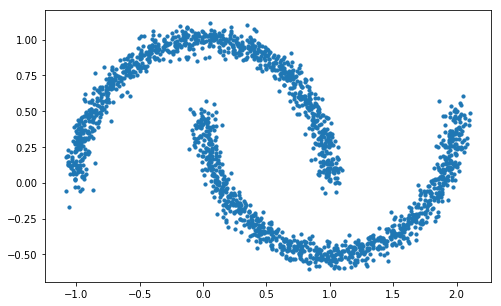

In [2]:
X = np.loadtxt('X.csv')

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X[:,0], X[:,1], s=10)
plt.show()

## 1.1 Hierarchical clustering  with moons dataset
**1.1.a TODO**
- Agglomerative clustering: average and single linkage
- Dendrogram cut: k=2 clusters

In [3]:
# Run clustering
model_avg = AgglomerativeClustering(2, linkage='average')
model_single = AgglomerativeClustering(2, linkage='single')
res_avg = model_avg.fit_predict(X)
res_single = model_single.fit_predict(X)

** 1.1.b Analysis **

**Average linkage between two clusters P, Q:**

$dist(P, Q) = avg(dist(p_i, q_j)) \quad | \quad p_i \in P, q_j \in Q$
- Tends to generate **globular** clusters

**Single linkage between two clusters P, Q:**

$dist(P, Q) = min(dist(p_i, q_j)) \quad | \quad p_i \in P, q_j \in Q$
- Also for non-globular clusters
- Tends to be affected by **noise**

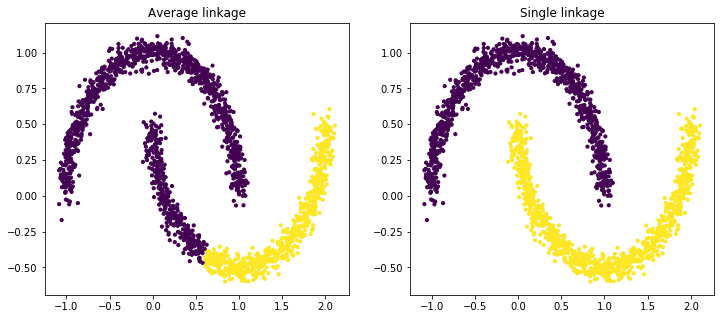

In [4]:
# Show results
fig, ax = plt.subplots(1, 2, figsize=[12,5])
ax[0].set_title("Average linkage")
ax[1].set_title("Single linkage")
ax[0].scatter(X[:,0], X[:,1], s=10, c=res_avg)
ax[1].scatter(X[:,0], X[:,1], s=10, c=res_single)
plt.show()

**1.1.b TODO**
Evaluation: compute silhouette and adjusted rand score
- **Silhouette**: internal metric, measures inter-cluster **separation** and cluster **cohesion**
- **Adjusted rand score**: external metric (needs ground truth labels)

In [5]:
# Ground truth labels
y_truth = np.loadtxt('y.csv')

# Compute silhouette
silh_avg = silhouette_score(X, res_avg)
silh_single = silhouette_score(X, res_single)
# Compute ARS
ars_avg = adjusted_rand_score(y_truth, res_avg)
ars_single = adjusted_rand_score(y_truth, res_single)

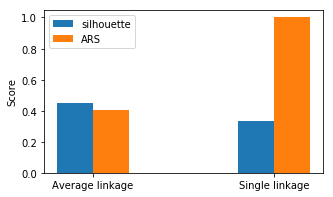

In [6]:
# Show results
fig, ax = plt.subplots(figsize=(5,3))
w=0.2
ax.bar([0-w/2, 1-w/2], [silh_avg, silh_single], width=w, label='silhouette')
ax.bar([0+w/2, 1+w/2], [ars_avg, ars_single], width=w, label='ARS')
ax.set_ylabel("Score")
ax.set_xticks([0, 1])
ax.set_xticklabels(['Average linkage','Single linkage'])
ax.legend()
plt.show()

**1.1.c Why is silhouette lower for single linkage?**

<img src="./ClusterSilhouette.png" width="80%" style="float:left">

# 2. Noisy moons dataset

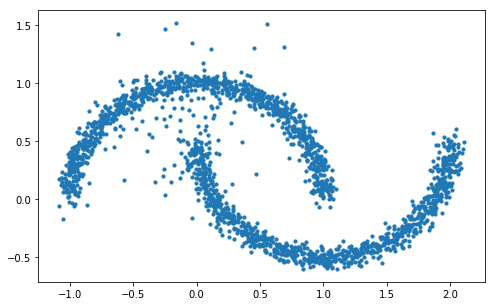

In [7]:
X_noise = np.loadtxt('X_noise.csv')

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X_noise[:,0], X_noise[:,1], s=10)
plt.show()

## 2.2 Hierarchical clustering with noisy dataset

In [8]:
# Run clustering
model_s2 = AgglomerativeClustering(2, linkage='single')
model_s50 = AgglomerativeClustering(50, linkage='single')
res_s2 = model_s2.fit_predict(X_noise)
res_s50 = model_s50.fit_predict(X_noise)

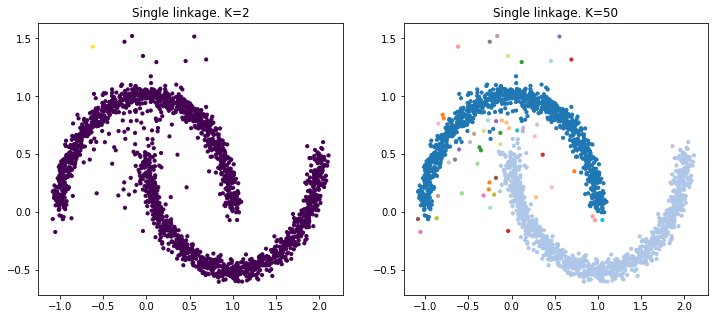

In [9]:
# Show results
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].set_title("Single linkage. K=2")
ax[1].set_title("Single linkage. K=50")
ax[0].scatter(X_noise[:,0], X_noise[:,1], s=10, c=res_s2)
ax[1].scatter(X_noise[:,0], X_noise[:,1], s=10, c=res_s50, cmap='tab20')
plt.show()

** 2.2.a Analysis **
- K=2: the two moons are connected by noise points
- K=10: moons are separated, but all noise points go in many different clusters

## 2.3 DBSCAN with noisy dataset
**2.3.a TODO **
To select eps and min_points we need the **K-Neighbors chart**

1. Fix k = min_points. E.g. k = 3
2. For each point $P_i$:
    - Compute the distance with all other points. E.g. [0.6, 0.7, 0.1, 0.5, 0.4]
    - Sort the distances (ascending). E.g. [0.1, 0.4, 0.5, 0.6, 0.7]
    - Take the distance of the $k^{th}$ nearest point. E.g. 0.5

Build a chart:
- x axis: list of points $P_i$
- y axis: distance between $P_i$ and the K-th (k=min_points) point


Example:

<table>
<tr>
<th>
<img src="./KNN_plot_details.png" width="80%">
</th>
<th>
<img src="./KNN_plot.png" width="90%">
</th>
</tr>
</table>

In [10]:
from sklearn.neighbors import NearestNeighbors

# Given matrix X and min_npoints, plot K-Neighbors chart
# It also plots a horizontal line in correspondence to eps value
def plot_neighbors(X, min_points, eps=0):
    nbrs = NearestNeighbors(n_neighbors=min_points + 1).fit(X)
    distances, indices = nbrs.kneighbors(X)

    k_dist = distances[:, -1]
    k_dist.sort()
    x_axis = np.arange(k_dist.shape[0])

    ### Disable comment below to activate interactive plots
    #%matplotlib notebook

    fig, ax = plt.subplots()
    ax.plot(x_axis, k_dist, linestyle='', marker='o', markersize=1)
    
    # Plot a horizontal line in correspondence to eps value
    ax.hlines(eps, x_axis.min(), x_axis.max(), linestyle='--')
    ax.set_title(f"K-Neighbors chart. Min_points = {min_points}, eps={eps}.")
    plt.show()

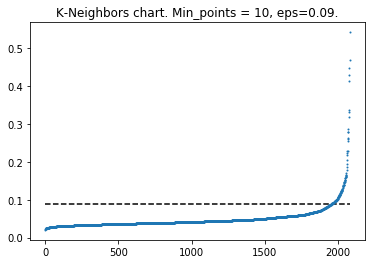

In [11]:
# Plot charts
plot_neighbors(X_noise, 10, eps=0.09)

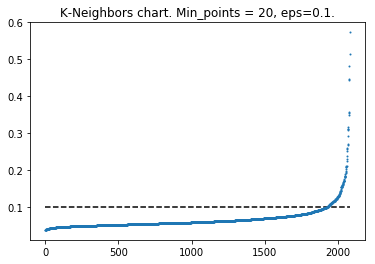

In [12]:
plot_neighbors(X_noise, 20, 0.1)

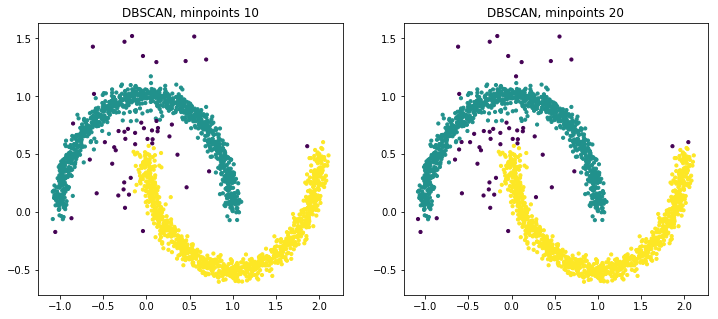

In [13]:
# Run clustering
model_db10 = DBSCAN(eps = 0.09, min_samples=10)
model_db20 = DBSCAN(eps = 0.1, min_samples=20)
res_db10 = model_db10.fit_predict(X_noise)
res_db20 = model_db20.fit_predict(X_noise)

# Show results
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].set_title("DBSCAN, minpoints 10")
ax[1].set_title("DBSCAN, minpoints 20")
ax[0].scatter(X_noise[:,0], X_noise[:,1], s=10, c=res_db10)
ax[1].scatter(X_noise[:,0], X_noise[:,1], s=10, c=res_db20)
plt.show()

# 3 Multiple-density dataset

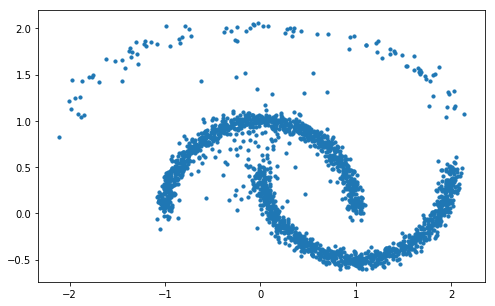

In [14]:
X_density = np.loadtxt('X_density.csv')

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X_density[:,0], X_density[:,1], s=10)
plt.show()

## 3.1.a DBSCAN with multiple densities

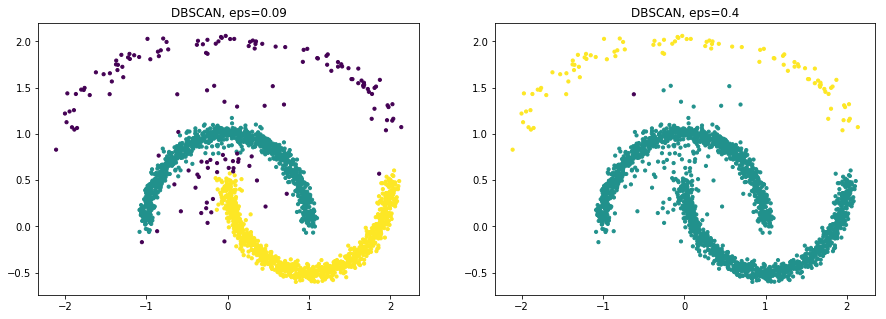

In [15]:
# Run clustering
model_db09 = DBSCAN(eps = 0.09, min_samples=10)
model_db04 = DBSCAN(eps = 0.4, min_samples=10)
res_db09 = model_db09.fit_predict(X_density)
res_db04 = model_db04.fit_predict(X_density)

# Show results
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title("DBSCAN, eps=0.09")
ax[1].set_title("DBSCAN, eps=0.4")
ax[0].scatter(X_density[:,0], X_density[:,1], s=10, c=res_db09)
ax[1].scatter(X_density[:,0], X_density[:,1], s=10, c=res_db04)
plt.show()

## 3.1.b Analyze DBSCAN noise
- Consider cluster results from res_db09

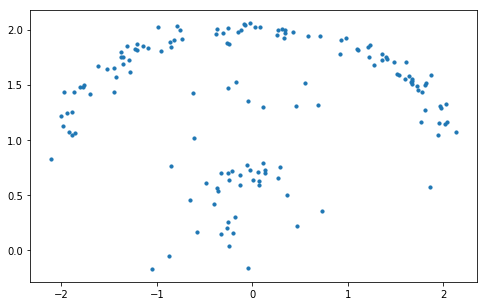

In [16]:
X_noise_points = X_density[res_db09==-1]

# Show results
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X_noise_points[:,0], X_noise_points[:,1], s=10)
plt.show()

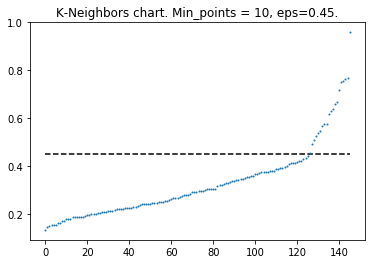

In [17]:
plot_neighbors(X_noise_points, 10, eps=0.45)

## 3.1.c Multiple-level DBSCAN
** TODO **
- Consider c_level1 = res_db09 (DBSCAN eps=0.09, min_points = 10)
- Generate c_level2 by clustering noise from c_level1 with eps = 0.45 and min_points = 10
- Generate c_final by composing c_level1 and c_level2

E.g.
```
c_level1 = [-1, 1, 0, -1, -1, -1, 0]
c_level2 = [0,         1,  0, -1   ]

Level1 and level2 contain clusters with the same names.
We should avoid name conflicts in c_final.

Rename Level1 clusters (except from noise) by adding (c_level2.max() + 1).
c_level1_renamed = [    3, 2,             2]

Merge the results:
c_level1 = [    3, 2,             2]
c_level2 = [0,         1,  0, -1   ]
c_final =  [0,  3, 2,  1,  0, -1, 2] 
```

In [18]:
c_level1 = res_db09
c_level2 = DBSCAN(eps = 0.45, min_samples=10).fit_predict(X_noise_points)

level1_noise_mask = (c_level1==-1)
c_level1_renamed = c_level1[~level1_noise_mask] + c_level2.max() + 1

c_final = np.empty(c_level1.shape)
c_final[~level1_noise_mask] = c_level1_renamed
c_final[level1_noise_mask] = c_level2

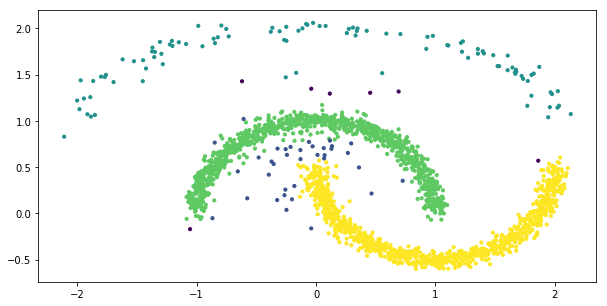

In [19]:
# Show results
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X_density[:,0], X_density[:,1], s=10, c=c_final)
plt.show()

# 4. Lines dataset

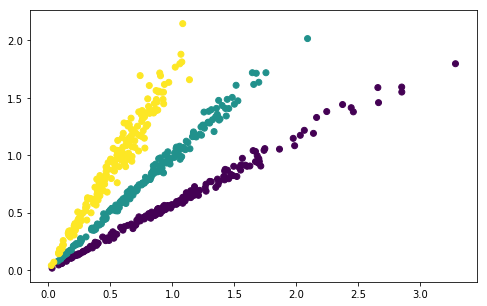

In [20]:
X_lines = np.loadtxt('X_lines.csv')
y_lines = np.loadtxt('y_lines.csv')

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X_lines[:,0], X_lines[:,1], c=y_lines)
plt.show()

## 4.1 KMeans and DBSCAN on Lines dataset

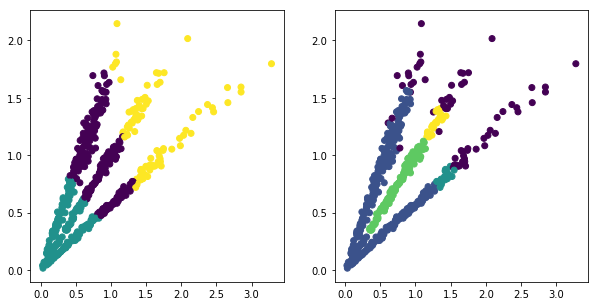

In [21]:
res_km3 = KMeans(3).fit_predict(X_lines)
res_db08 = DBSCAN(eps=0.08, min_samples=10).fit_predict(X_lines)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].scatter(X_lines[:,0], X_lines[:,1], c=res_km3)
ax[1].scatter(X_lines[:,0], X_lines[:,1], c=res_db08)
plt.show()

## 4.1 Data transformation: polar coordinates
**TODO**
- Apply data transformation to X_lines

<br>
<img src="./polar.png" width="50%" style="float:left">

In [22]:
rho = np.sqrt(X_lines[:, 0]**2 + X_lines[:, 1]**2) 
theta = np.arctan2(X_lines[:, 1], X_lines[:, 0])             
X_polar = np.hstack((rho[:,np.newaxis], theta[:,np.newaxis]))

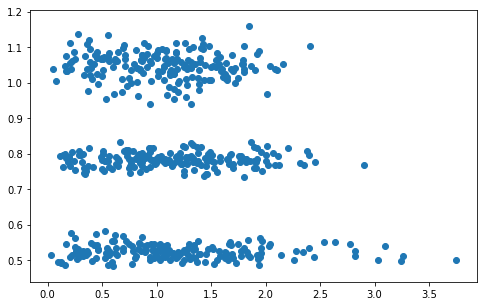

In [23]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X_polar[:,0], X_polar[:,1])
plt.show()

## 4.2 Clustering on transformed data

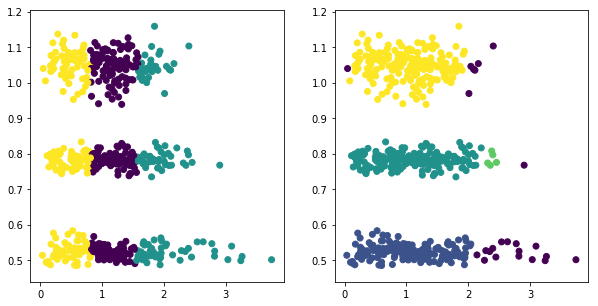

In [24]:
res_km_polar = KMeans(3).fit_predict(X_polar)    
res_db_polar = DBSCAN(eps=0.10, min_samples=5).fit_predict(X_polar)
    
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].scatter(X_polar[:,0], X_polar[:,1], c=res_km_polar)
ax[1].scatter(X_polar[:,0], X_polar[:,1], c=res_db_polar)
plt.show()

## 4.2.a Plot clusters back on original data

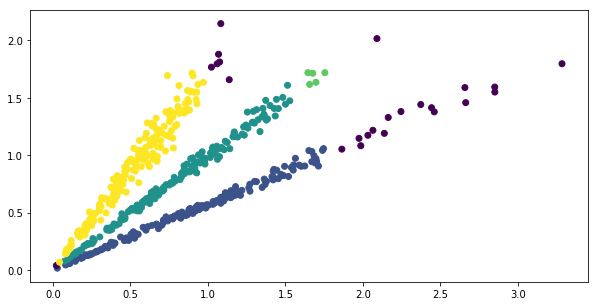

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X_lines[:,0], X_lines[:,1], c=res_db_polar)
plt.show()